In [1]:
from sympy import symbols, exp, lambdify, simplify, expand, solve, latex
from sympy.integrals import inverse_laplace_transform
import sympy

from numpy import linspace
from matplotlib.pyplot import plot, grid, xlabel, ylabel, legend, title, xlim
from control import tf, margin, step_response

import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')

# Problem 14.7

## Part A

poles: $\boxed{0}$

zeros:

$1-\gamma\exp\left(-\theta s\right)=0$

$\frac{1}{\gamma}=\frac{1}{\exp\left(\theta s\right)}$

$s=\boxed{\frac{\ln\gamma}{\theta}}$

The reboiler is not BIBO stable. The poles are not all real and negative.

## Part B

$U(s)=\frac{1}{s}$

$Y(s)=\frac{1-\gamma e^{-s\theta}}{s^{2}}$

$y(t)=\mathcal{L}^{-1}\left\{\frac{1-\gamma e^{-s\theta}}{s^{2}}\right\}$

$$\boxed{y(t)=-\gamma\left(t-\theta\right)\mathcal{H}\left(t-\theta\right)+t\mathcal{H}\left(t\right)}$$

In [2]:
s, t, theta, gamma = symbols("s, t, theta, gamma", real=True)

In [3]:
Y = (1 - gamma * exp(-theta * s)) / s**2
y = inverse_laplace_transform(Y, s, t)
y

-gamma*(t - theta)*Heaviside(t - theta) + t*Heaviside(t)

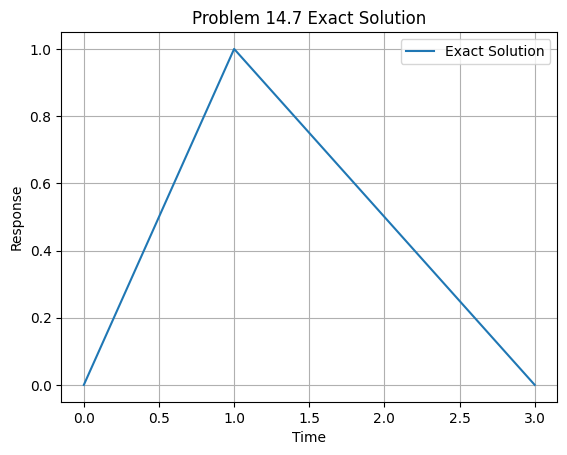

In [4]:
y_lambda = lambdify(t, y.subs({gamma: 1.5, theta: 1}), "numpy")

t_range = linspace(0, 3, 100)

plot(t_range, y_lambda(t_range), label="Exact Solution")
grid(which="both")
xlabel("Time")
ylabel("Response")
title("Problem 14.7 Exact Solution")
legend()

The response goes to 0 as $t$ goes to $\infty$.

## Part C

1st order Pade

$\frac{1-\frac{s\theta}{2}}{1+\frac{s\theta}{2}}$

$Y(s)=\frac{-\frac{\gamma\left(-\frac{s\theta}{2}+1\right)}{\frac{s\theta}{2}+1}+1}{s^{2}}$

$y(t)=\mathcal{L}^{-1}\left\{\frac{-\frac{\gamma\left(-\frac{s\theta}{2}+1\right)}{\frac{s\theta}{2}+1}+1}{s^{2}}\right\}$

$$\boxed{y(t)=\left(-\gamma\theta+\left(\gamma\theta-t\left(\gamma-1\right)\right)e^{\frac{2t}{\theta}}\right)e^{-\frac{2t}{\theta}}}$$

2nd order Pade

$\frac{\frac{s^{2}\theta^{2}}{12}-\frac{s\theta}{2}+1}{\frac{s^{2}\theta^{2}}{12}+\frac{s\theta}{2}+1}$

$Y(s)=\frac{-\frac{\gamma\left(\frac{s^{2}\theta^{2}}{12}-\frac{s\theta}{2}+1\right)}{\frac{s^{2}\theta^{2}}{12}+\frac{s\theta}{2}+1}+1}{s^{2}}$

$y(t)=\mathcal{L}^{-1}\left\{\frac{-\frac{\gamma\left(\frac{s^{2}\theta^{2}}{12}-\frac{s\theta}{2}+1\right)}{\frac{s^{2}\theta^{2}}{12}+\frac{s\theta}{2}+1}+1}{s^{2}}\right\}$

$$\boxed{y(t)=\left(-2\gamma\theta\sin{\left(\frac{\sqrt{3}t}{\theta}+\frac{\pi}{6}\right)}+\left(\gamma\theta-t\left(\gamma-1\right)\right)e^{\frac{3t}{\theta}}\right)e^{-\frac{3t}{\theta}}}$$

In [5]:
pade_1 = (1 - theta * s / 2) / (1 + theta * s / 2)
pade_2 = (1 - theta * s / 2 + theta**2 * s**2 / 12) / (1 + theta * s / 2 + theta**2 * s**2 / 12)

Y_p1 = (1 - gamma * pade_1) / s**2
y_p1 = inverse_laplace_transform(Y_p1, s, t)
y_p1

(-gamma*theta + (gamma*theta - t*(gamma - 1))*exp(2*t/theta))*exp(-2*t/theta)*Heaviside(t)

In [6]:
Y_p2 = (1 - gamma * pade_2) / s**2
y_p2 = inverse_laplace_transform(Y_p2, s, t)
y_p2

(-2*gamma*theta*sin(sqrt(3)*t/theta + pi/6) + (gamma*theta - t*(gamma - 1))*exp(3*t/theta))*exp(-3*t/theta)*Heaviside(t)

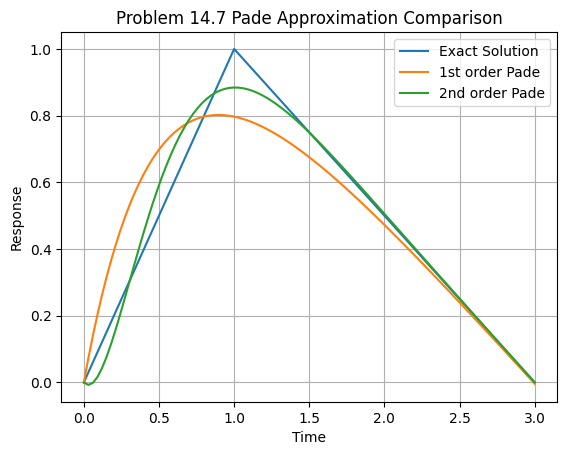

In [7]:
y_p1_lambda = lambdify(t, y_p1.subs({gamma: 1.5, theta: 1}), "numpy")
y_p2_lambda = lambdify(t, y_p2.subs({gamma: 1.5, theta: 1}), "numpy")

t_range = linspace(0, 3, 100)

plot(t_range, y_lambda(t_range), label="Exact Solution")
plot(t_range, y_p1_lambda(t_range), label="1st order Pade")
plot(t_range, y_p2_lambda(t_range), label="2nd order Pade")
grid(which="both")
xlabel("Time")
ylabel("Response")
title("Problem 14.7 Pade Approximation Comparison")
legend()

# Problem 14.8

$G_c=k_c$

$G=\frac{G_cG_p}{1+G_cG_p}$

Use $\gamma=1.5$ and $\theta=1$

1st order Pade

$G_p=\frac{-\frac{\gamma\left(-\frac{s\theta}{2}+1\right)}{\frac{s\theta}{2}+1}+1}{s}$

$G=\frac{k_{c}\left(1.0-2.5s\right)}{k_{c}\left(1.0-2.5s\right)-s\left(s+2\right)}$

common denominator $=-2.5k_{c}s+1.0k_{c}-s^{2}-2s$

$a_0=-1$

$a_1=-2.5k_{c}-2$

$a_2=k_c$

$k_c<-0.8$

$\boxed{k_c>0}$

2nd order Pade

$G_p=\frac{-\gamma\frac{\frac{s^{2}\theta^{2}}{12}-\frac{s\theta}{2}+1}{\frac{s^{2}\theta^{2}}{12}+\frac{s\theta}{2}+1}+1}{s}$

$G=\frac{k_{c}\left(0.5s^{2}-15.0s+6.0\right)}{k_{c}\left(0.5s^{2}-15.0s+6.0\right)-s\left(s^{2}+6s+12\right)}$

common denominator $=0.5k_{c}s^{2}-15.0k_{c}s+6.0k_{c}-s^{3}-6s^{2}-12s$

$a_0=-1$

$a_1=0.5k_{c}-6$

$a_2=-15.0k_{c}-12$

$a_3=6.0k_{c}$

$B_1=-7.5k_{c}^{2}+90.0k_{c}+72.0$

$C_1=a_3$

$k_c<12$

$-0.75<k_c<12.75$

$k_c>0$

$\boxed{0<k_c<12.75}$

Finding the exact stability range involves finding the crossover frequency and then finding the AR at the crossover frequency. 

In [8]:
k_c = symbols("k_c")

G_p1 = ((1 - gamma * pade_1) / s).subs({gamma: 1.5, theta: 1})

G = simplify(k_c * G_p1 / (1 + k_c * G_p1))
G

k_c*(1.0 - 2.5*s)/(k_c*(1.0 - 2.5*s) - s*(s + 2))

In [9]:
den = expand((k_c*(1.0 - 2.5*s) - s*(s + 2)))
den

-2.5*k_c*s + 1.0*k_c - s**2 - 2*s

In [10]:
a_0 = den.coeff(s**2)
a_1 = den.coeff(s)
a_2 = expand(den - a_0 * s**2 - a_1 * s)

In [11]:
solve(a_1 > 0, k_c)

(-oo < k_c) & (k_c < -0.8)

In [12]:
solve(a_2 > 0, k_c)

(0 < k_c) & (k_c < oo)

In [13]:
k_c = symbols("k_c")

G_p2 = ((1 - gamma * pade_2) / s).subs({gamma: 1.5, theta: 1})

G = simplify(k_c * G_p2 / (1 + k_c * G_p2))
G

k_c*(0.5*s**2 - 15.0*s + 6.0)/(k_c*(0.5*s**2 - 15.0*s + 6.0) - s*(s**2 + 6*s + 12))

In [14]:
den = expand((k_c*(0.5*s**2 - 15.0*s + 6.0) - s*(s**2 + 6*s + 12)))
den

0.5*k_c*s**2 - 15.0*k_c*s + 6.0*k_c - s**3 - 6*s**2 - 12*s

In [15]:
a_0 = den.coeff(s**3)
a_1 = den.coeff(s**2)
a_2 = den.coeff(s)
a_3 = expand(den - a_0 * s**3 - a_1 * s**2 - a_2 * s)

In [16]:
B_1 = simplify(a_1 * a_2 - a_0 * a_3)
C_1 = a_3

In [17]:
solve(a_1 > 0, k_c)

(12.0 < k_c) & (k_c < oo)

In [18]:
solve(B_1 > 0, k_c)

(-0.752777206453654 < k_c) & (k_c < 12.7527772064537)

In [19]:
solve(C_1 > 0, k_c)

(0 < k_c) & (k_c < oo)

# 17.1

## Part A

$G=\frac{2}{s\left(s+1\right)^2}$

$L=\frac{2k_c}{s\left(s+1\right)^2}$

$|\text{L}(i\omega)|=\frac{2k_c}{\omega\left(\omega^2+1\right)}$

$\text{arg}L(i\omega)=-90-2\tan^{-1}\omega$

Find $\omega_p$

$-90-2\tan^{-1}\omega_p=-180$

$\omega_p=1$

GM $=\frac{1}{\frac{2k_c}{\omega_p\left(\omega_p^2+1\right)}}$

2 $=\frac{1}{\frac{2k_c}{1\left(1^2+1\right)}}$

$\boxed{k_c=0.5}$

In [20]:
# vefify gain margin is 2
k = 0.5
L = tf(2 * k, [1, 2, 1, 0])
margin(L)

(2.0, 21.386389751875043, 1.0, 0.6823278038280193)

## Part B

PM $=-90-2\tan^{-1}\omega_g+180$

$30=-90-2\tan^{-1}\omega_g+180$

$\omega_g=0.5774$

$1=\frac{2k_c}{\omega_g\left(\omega_g^2+1\right)}$

$1=\frac{2k_c}{0.5774\cdot\left(0.5774^2+1\right)}$

$\boxed{k_c=0.3842}$

In [21]:
# verify phase margin is 30
k = 0.38490017946
L = tf(2 * k, [1, 2, 1, 0])
margin(L)

(2.598076211351632, 29.99999999997854, 1.0, 0.5773502691898753)

## Part C

(0.0, 50.0)

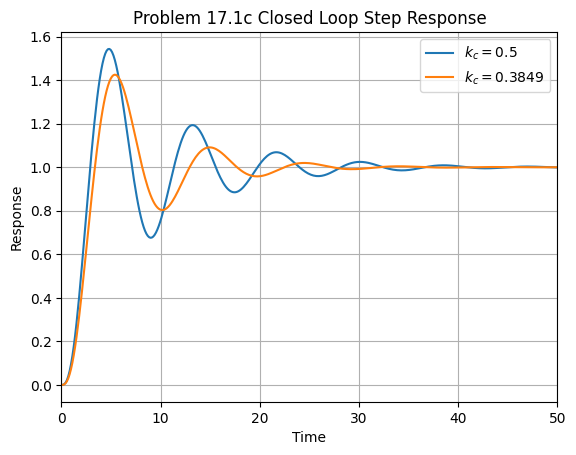

In [22]:
k = 0.5
L = tf(2 * k, [1, 2, 1, 0])
G = L / (1 + L)
t, y = step_response(G)
plot(t, y, label=r"$k_c=0.5$")

k = 0.38490017946
L = tf(2 * k, [1, 2, 1, 0])
G = L / (1 + L)
t, y = step_response(G)
plot(t, y, label=r"$k_c=0.3849$")

grid(which="both")
xlabel("Time")
ylabel("Response")
title("Problem 17.1c Closed Loop Step Response")
legend()
xlim([0, 50])

## Part D

$|\text{L}(i\omega_p)|<1$

$\frac{2k_c}{1\cdot\left(1^2+1\right)}<1$

$\boxed{k_c<1}$

(0.0, 100.0)

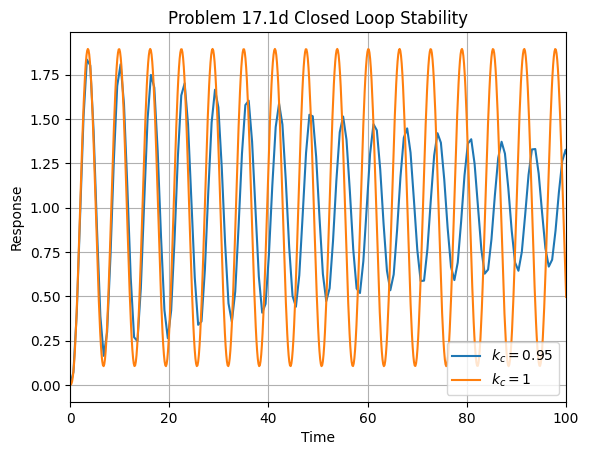

In [23]:
# verify stability
k = 0.95
L = tf(2 * k, [1, 2, 1, 0])
G = L / (1 + L)
t, y = step_response(G)
plot(t, y, label=r"$k_c=0.95$")

k = 1
L = tf(2 * k, [1, 2, 1, 0])
G = L / (1 + L)
t, y = step_response(G)
plot(t, y, label=r"$k_c=1$")

grid(which="both")
xlabel("Time")
ylabel("Response")
title("Problem 17.1d Closed Loop Stability")
legend(loc="lower right")
xlim([0, 100])

For $k_c<1$ the response dies down, while for $k_c=1$ the response oscillates forever.

# 17.9

## Part A

$\omega_p=1$

$|G_p(i\omega_p)|=0.5$

$k_c|G_p(i\omega_p)|<1$

$\boxed{k_c<2}$

Offset:

offset $=\frac{1}{1+k_pk_c}$

$k_p\approx5$

offset $=\boxed{\frac{1}{1+5k_c}}$

## Part B

$|\text{L}(i\omega_p)|\approx0.5$

$\boxed{\text{GM}=0.5}$

$\text{arg}L(i\omega_g)=-150$

$\boxed{\text{PM}=30}$

## Part C

$G_c=k_c\left(1+25s\right)$

$|G_c(i\omega)|=k_c\sqrt{25^2\omega^2+1}$

$\text{arg}G_c(i\omega)=-\tan^{-1}\left(25\omega\right)$

$\text{arg}G_c(i\omega_p)=-180$

$\omega_p=0$

$k_c\sqrt{25^2\cdot0^2+1}<1$

$\boxed{k_c<1}$